# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
# Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import joblib
#Type your code here

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [13]:
url = "https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m"
df = pd.read_csv(url)




In [14]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [15]:
# Tinjau jumlah baris kolom dan jenis data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [21]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe(include='all')


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2508,2516,2511.000000,2509,2507,2507,2507,2517,2514,2510,2519.000000,2514,2511.000000,2516.000000,2510.000000,2513
unique,2484,495,NaN,2485,2,43,681,591,100,3,NaN,4,NaN,NaN,NaN,360
top,TX001748,AC00362,NaN,2023-10-20 17:53:13,Debit,Fort Worth,D000573,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 08:09:17
freq,2,12,NaN,2,1942,71,9,12,46,868,NaN,657,NaN,NaN,NaN,18
mean,NaN,NaN,297.656468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.678444,NaN,119.422939,1.121622,5113.438124,NaN
std,NaN,NaN,292.230367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.837359,NaN,70.078513,0.594469,3897.975861,NaN
min,NaN,NaN,0.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,NaN
25%,NaN,NaN,81.310000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.727500,NaN
50%,NaN,NaN,211.360000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.000000,1.000000,4734.110000,NaN
75%,NaN,NaN,413.105000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7672.687500,NaN


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

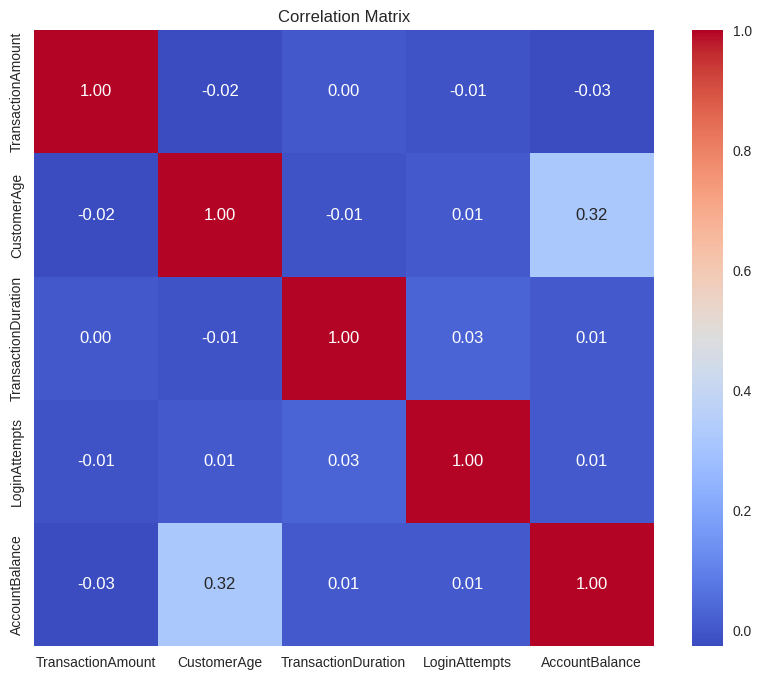

In [27]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


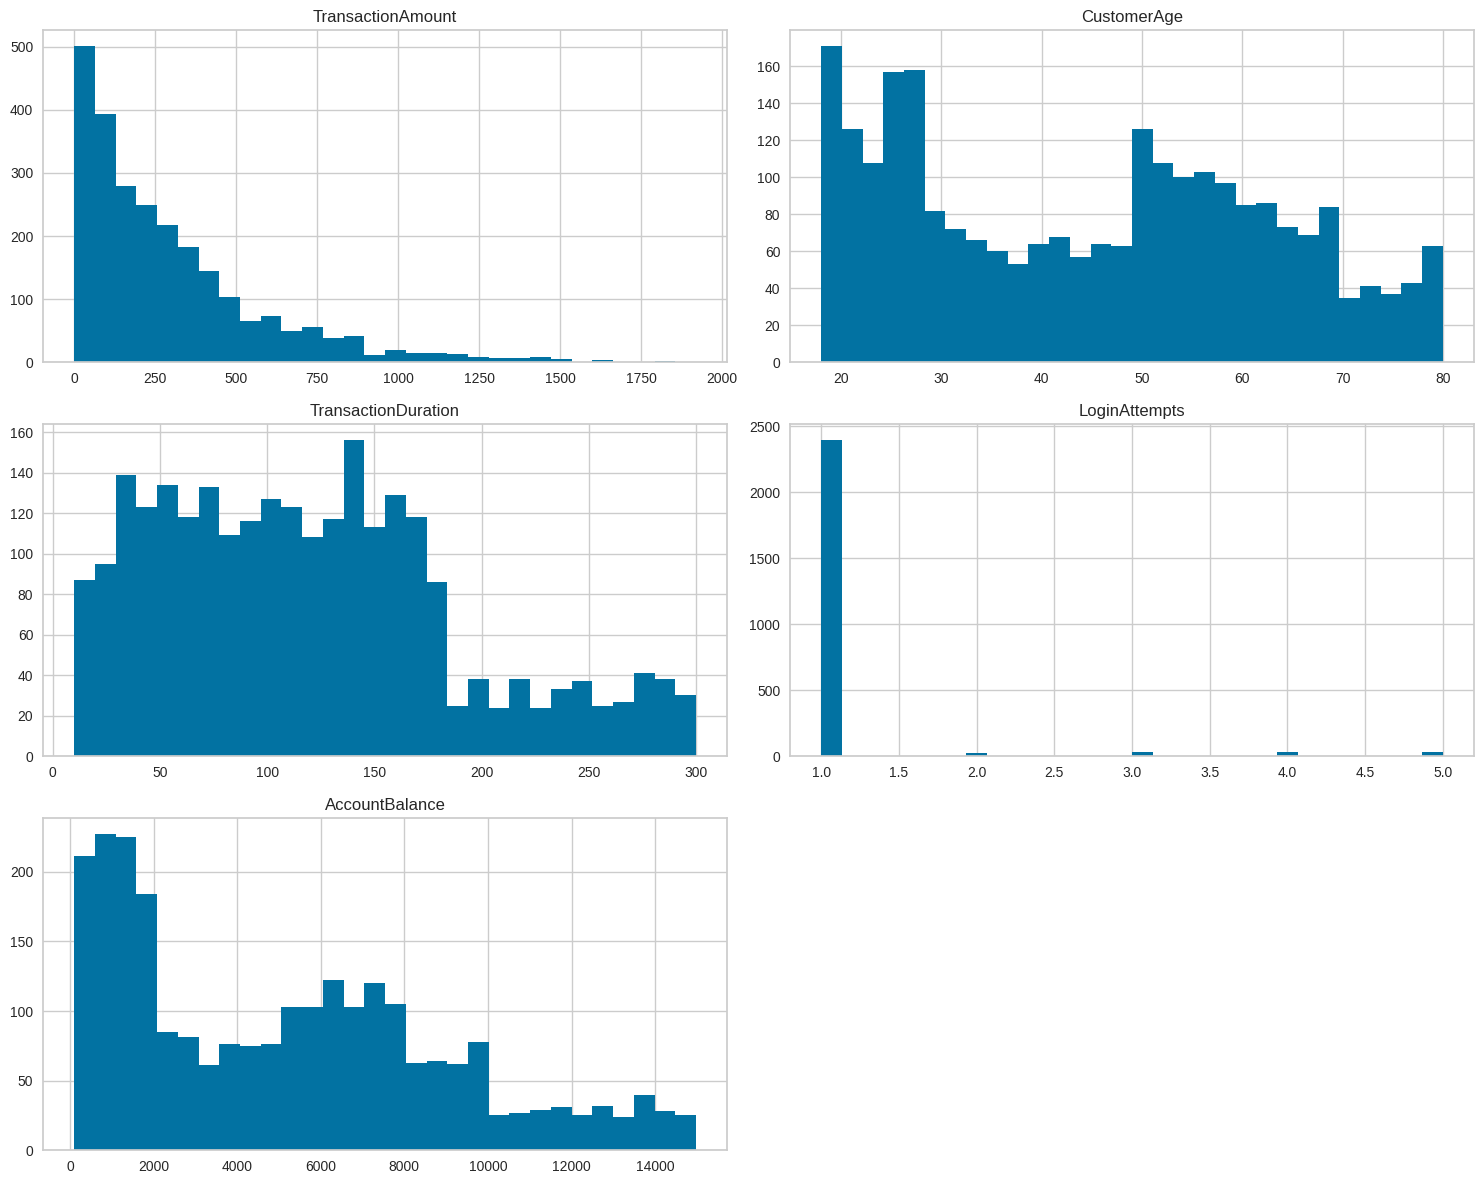

In [31]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
df.hist(figsize=(15,12), bins=30)
plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

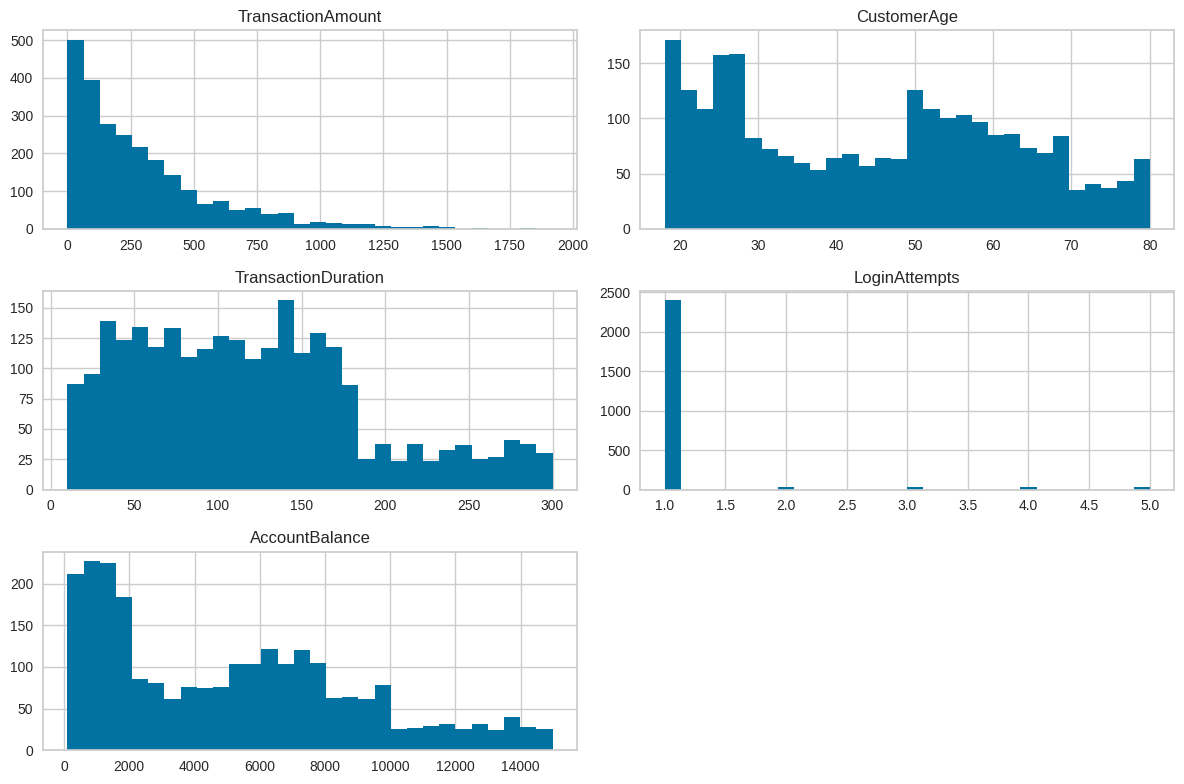

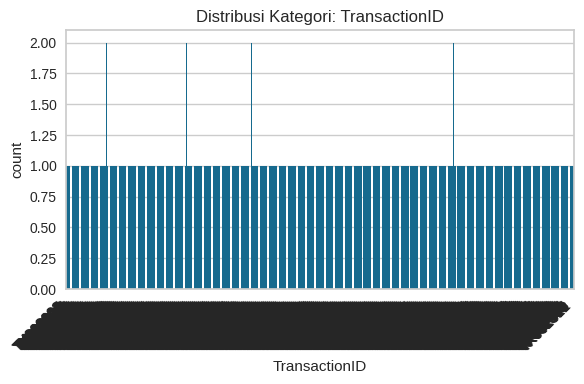

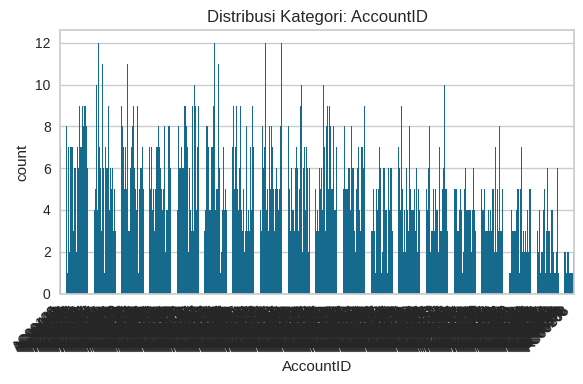

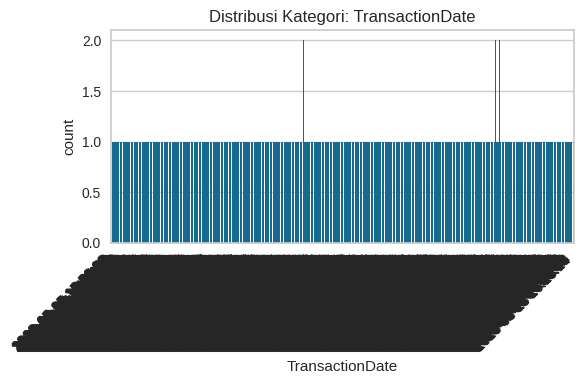

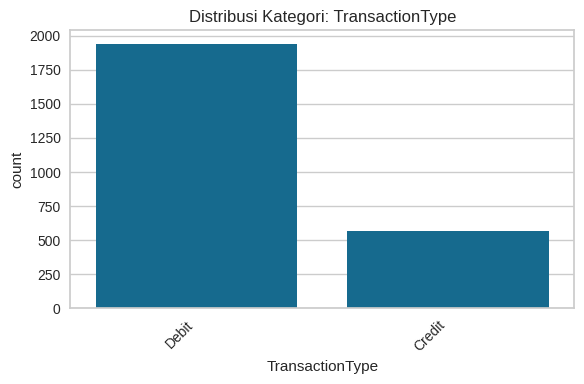

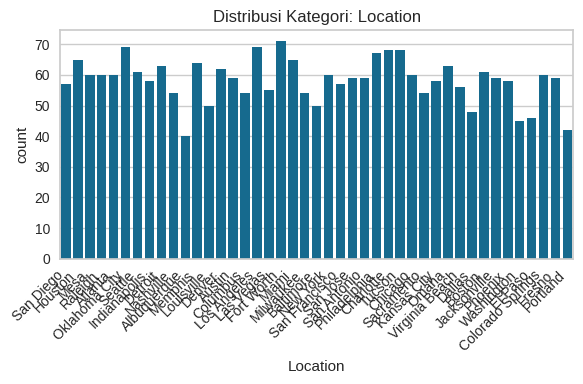

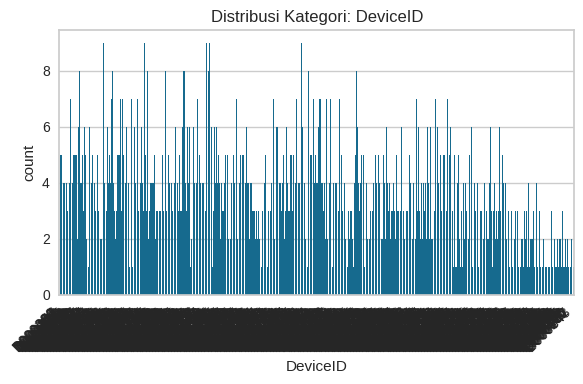

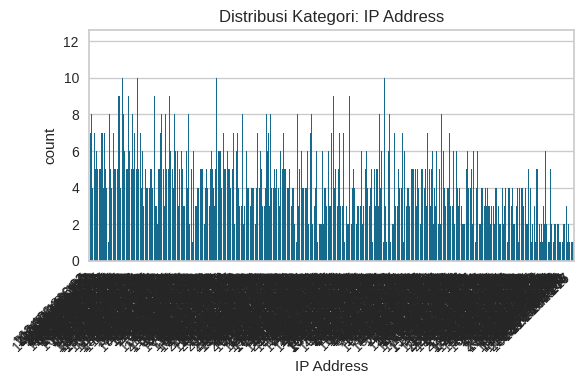

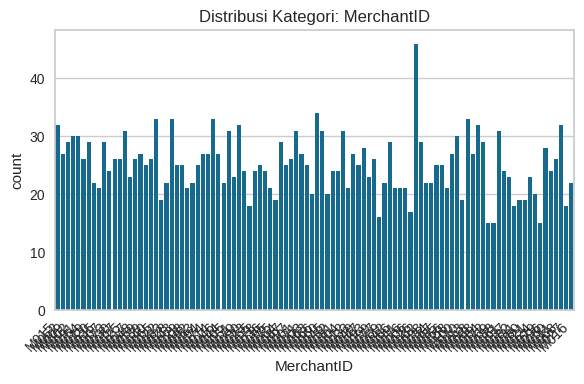

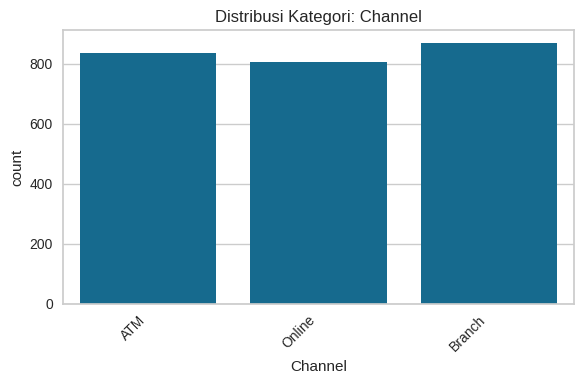

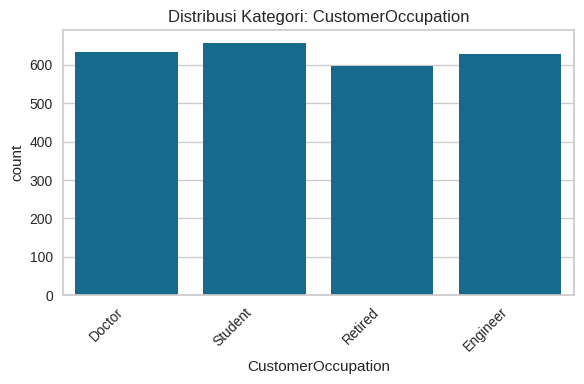

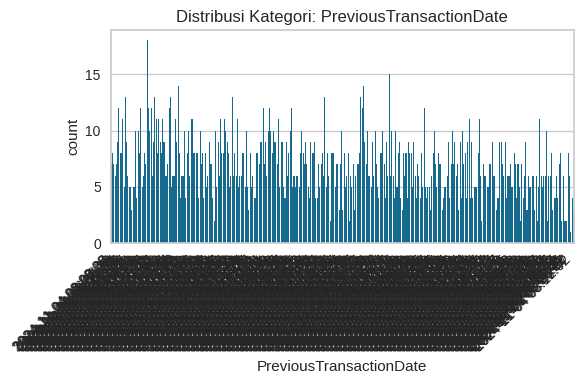

In [32]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

import seaborn as sns
import matplotlib.pyplot as plt

# Histogram untuk fitur numerik
df.hist(figsize=(12,8), bins=30)
plt.tight_layout()
plt.show()

# Countplot untuk fitur kategorikal
for col in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col])
    plt.title(f"Distribusi Kategori: {col}")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [34]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [35]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(21)

In [43]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
scaler = MinMaxScaler()
num_cols = df.select_dtypes(include=['int64','float64']).columns
df[num_cols] = scaler.fit_transform(df[num_cols])
df.head()
python
Copy code


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [40]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df = df.drop(columns=['id','IPAddress'], errors='ignore')
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [44]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
encoder = LabelEncoder()
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col].astype(str))
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0,126,0.007207,680,1,36,365,186,14,0,0.838710,0,0.244828,0.0,0.336832,105
1,1,450,0.195940,1178,1,15,50,82,51,0,0.806452,0,0.451724,0.0,0.918055,192
2,2,18,0.065680,1262,1,23,229,342,8,2,0.016129,3,0.158621,0.0,0.068637,41
3,3,68,0.096016,818,1,33,182,300,1,2,0.129032,3,0.051724,0.0,0.569198,163
4,4,406,0.006874,1939,0,1,298,500,90,2,NaN,3,0.648276,0.0,0.492591,16


In [45]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
# ____.columns.tolist()
df.columns.tolist()

['TransactionID',
 'AccountID',
 'TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'DeviceID',
 'IP Address',
 'MerchantID',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [46]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from scipy import stats

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("Missing values setelah imputasi:\n", df.isnull().sum().sum())

Missing values setelah imputasi:
 0


In [47]:
# Menghapus data duplikat menggunakan drop_duplicates().
dup_count = df.duplicated().sum()
if dup_count > 0:
    df = df.drop_duplicates().reset_index(drop=True)
print(f"Jumlah duplikat yang dihapus: {dup_count}")

Jumlah duplikat yang dihapus: 22


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [48]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
outliers_mask = (np.abs(stats.zscore(df[num_cols])) > 3).any(axis=1)
outlier_count = outliers_mask.sum()
df = df.loc[~outliers_mask].reset_index(drop=True)
print(f"Jumlah outlier yang dihapus: {outlier_count}")

Jumlah outlier yang dihapus: 138


In [49]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.

binned_features = []
if len(num_cols) >= 1:
    col1 = num_cols[0]
    df[f'{col1}_bin'] = pd.cut(df[col1], bins=4, labels=False)
    binned_features.append(f'{col1}_bin')

if len(num_cols) >= 2:
    col2 = num_cols[1]
    df[f'{col2}_bin'] = pd.cut(df[col2], bins=4, labels=False)
    binned_features.append(f'{col2}_bin')

le = LabelEncoder()
for col in binned_features:
    df[f'{col}_enc'] = le.fit_transform(df[col].astype(str))

print("Fitur hasil binning dan encoding:", [f"{col}_enc" for col in binned_features])

scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print("\nPra-pemrosesan selesai.")
print("Shape dataset setelah preprocessing:", df.shape)
df.head()


Fitur hasil binning dan encoding: ['TransactionID_bin_enc', 'AccountID_bin_enc']

Pra-pemrosesan selesai.
Shape dataset setelah preprocessing: (2377, 20)


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionID_bin,AccountID_bin,TransactionID_bin_enc,AccountID_bin_enc
0,0.000000,0.254545,0.011827,0.273642,0.5,0.837209,0.535977,0.314721,0.14,0.000000,0.838710,0.00,0.244828,0.0,0.336832,0.291667,0,1,0,1
1,0.000403,0.909091,0.321535,0.474044,0.5,0.348837,0.073421,0.138748,0.51,0.000000,0.806452,0.00,0.451724,0.0,0.918055,0.533333,0,3,0,3
2,0.000805,0.036364,0.107780,0.507847,0.5,0.534884,0.336270,0.578680,0.08,0.666667,0.016129,0.75,0.158621,0.0,0.068637,0.113889,0,0,0,0
3,0.001208,0.137374,0.157560,0.329175,0.5,0.767442,0.267254,0.507614,0.01,0.666667,0.129032,0.75,0.051724,0.0,0.569198,0.452778,0,0,0,0
4,0.001610,0.820202,0.011280,0.780282,0.0,0.023256,0.437592,0.846024,0.90,0.666667,0.435484,0.75,0.648276,0.0,0.492591,0.044444,0,3,0,3


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [50]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()
df.describe()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionID_bin,AccountID_bin,TransactionID_bin_enc,AccountID_bin_enc
count,2377.000000,2377.000000,2377.000000,2377.000000,2377.000000,2377.000000,2377.000000,2377.000000,2377.000000,2377.000000,2377.000000,2377.00000,2377.000000,2377.000000,2377.000000,2377.000000,2377.000000,2377.000000,2377.000000,2377.000000
mean,0.506059,0.502188,0.236466,0.504732,0.395036,0.495514,0.504422,0.503187,0.489945,0.336418,0.431162,0.38231,0.375572,0.010938,0.337019,0.503357,1.519142,1.510307,1.519142,1.510307
std,0.292301,0.292395,0.213286,0.291662,0.218621,0.288928,0.294492,0.288483,0.292649,0.276749,0.285664,0.28704,0.239733,0.104034,0.259807,0.288498,1.123175,1.120666,1.123175,1.120666
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.253221,0.248485,0.068561,0.253119,0.500000,0.255814,0.251101,0.253807,0.240000,0.000000,0.145161,0.00000,0.182759,0.000000,0.095571,0.255556,1.000000,0.000000,1.000000,0.000000
50%,0.507649,0.511111,0.178589,0.503823,0.500000,0.488372,0.505140,0.497462,0.490000,0.333333,0.435484,0.50000,0.351724,0.000000,0.311416,0.502778,2.000000,2.000000,2.000000,2.000000
75%,0.759259,0.753535,0.333601,0.756942,0.500000,0.744186,0.757709,0.758037,0.730000,0.666667,0.661290,0.75000,0.520690,0.000000,0.505443,0.755556,3.000000,3.000000,3.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000


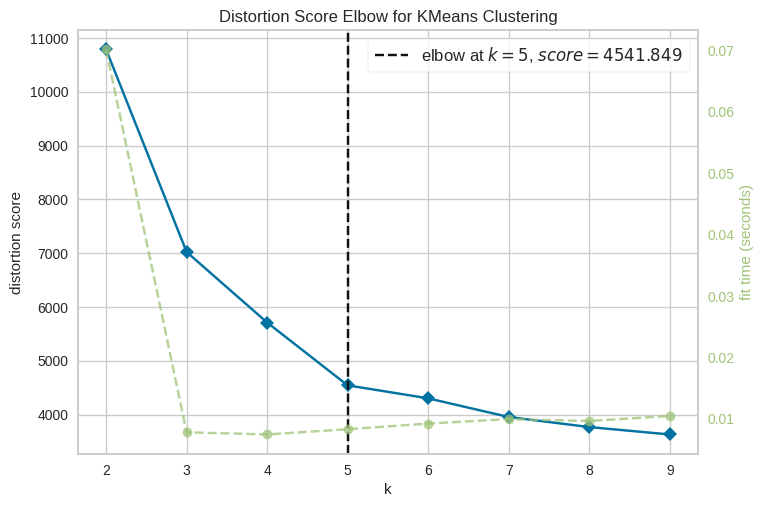

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [51]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(df)
visualizer.show()

In [53]:
# Menggunakan algoritma K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Target'] = kmeans.fit_predict(df)

Jalankan cell code ini untuk menyimpan model kamu.

In [54]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [55]:
# Menghitung dan menampilkan nilai Silhouette Score.
score = silhouette_score(df.drop(columns='Target'), df['Target'])
print("Silhouette Score:", score)

Silhouette Score: 0.30302961797345845


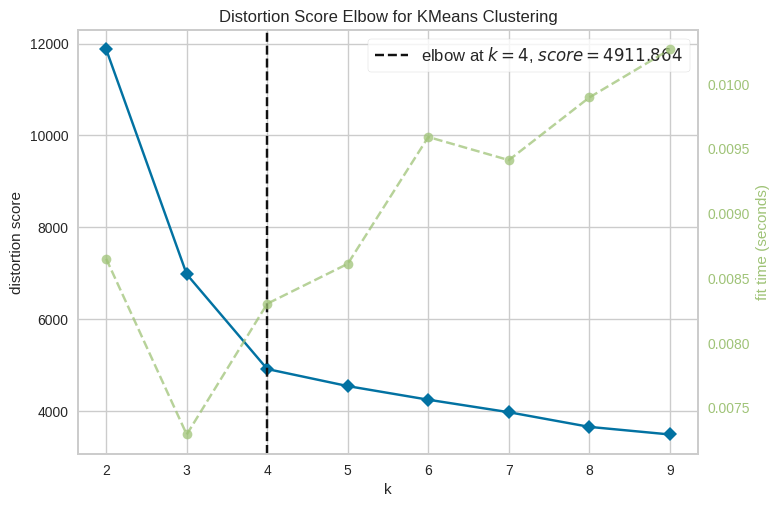

Jumlah cluster optimal: 4


In [56]:
# Membuat visualisasi hasil clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# --- 1. Menentukan jumlah cluster terbaik dengan Elbow Method ---
X = df.select_dtypes(include=[np.number])  # hanya pakai fitur numerik hasil preprocessing

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(X)
visualizer.show()

optimal_k = visualizer.elbow_value_
print("Jumlah cluster optimal:", optimal_k)

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

Silhouette Score: 0.3756666048502358


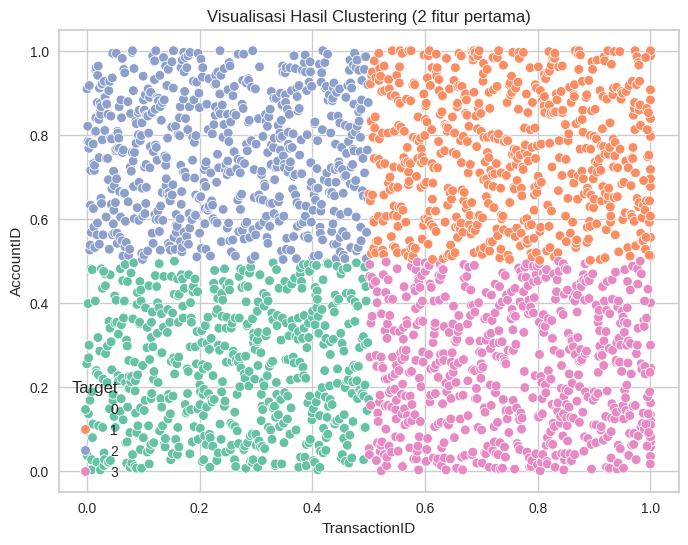

In [57]:
# Membangun model menggunakan PCA.
# ___ =PCA(n_components=<x>)
# ___ = ____.fit_transform(___)
# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
# <data_final> = pd.DataFrame(___, columns=['PCA1', 'PCA2', <sesuaikan dengan jumlah n>])
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
# ___ = KMeans(n_clusters=<x>)
# ___.fit(<data_final>)


kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Target'] = kmeans.fit_predict(X)

joblib.dump(kmeans, "model_clustering")


score = silhouette_score(X, df['Target'])
print("Silhouette Score:", score)


plt.figure(figsize=(8,6))
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], hue=df['Target'], palette="Set2")
plt.title("Visualisasi Hasil Clustering (2 fitur pertama)")
plt.show()

pca = PCA(n_components=2)  # ubah jumlah komponen sesuai kebutuhan
pca_result = pca.fit_transform(X)

PCA_data = pd.DataFrame(pca_result, columns=['PCA1','PCA2'])
PCA_data['Target'] = df['Target']



Hasil PCA Clustering dengan KMeans selesai.
       PCA1      PCA2  Target  Target_PCA
0 -0.172736 -2.381665       0           0
1  3.073204 -1.185240       2           2
2 -1.379283 -2.899498       0           0
3 -1.366249 -2.895965       0           0
4  3.062294 -1.182030       2           2


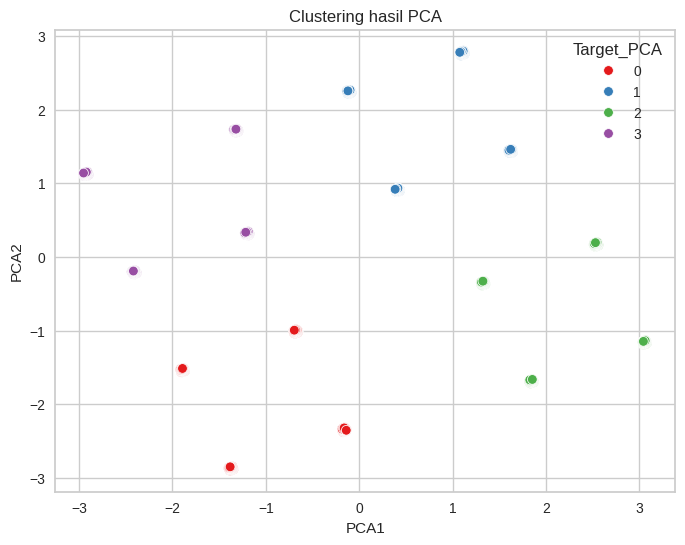

In [58]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
# joblib.dump(___, "PCA_model_clustering.h5")
# Simpan model PCA
joblib.dump(pca, "PCA_model_clustering.h5")


kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42)
PCA_data['Target_PCA'] = kmeans_pca.fit_predict(PCA_data[['PCA1','PCA2']])

print("\nHasil PCA Clustering dengan KMeans selesai.")
print(PCA_data.head())


plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Target_PCA', data=PCA_data, palette="Set1")
plt.title("Clustering hasil PCA")
plt.show()

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [59]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.
df.groupby('Target').agg(['mean','min','max'])

TransactionID                     AccountID                    \
                mean       min       max      mean      min      max   
Target                                                                 
0           0.253067  0.000000  0.500000  0.245912  0.00202  0.49899   
1           0.754514  0.500403  1.000000  0.750490  0.50101  1.00000   
2           0.246113  0.000403  0.499195  0.750540  0.50303  1.00000   
3           0.755975  0.500805  1.000000  0.243618  0.00000  0.49899   

       TransactionAmount                     TransactionDate  ...  \
                    mean       min       max            mean  ...   
Target                                                        ...   
0               0.234026  0.000624  0.988532        0.510281  ...   
1               0.240205  0.000162  1.000000        0.503109  ...   
2               0.235528  0.000513  0.993868        0.500935  ...   
3               0.235989  0.000000  0.977833        0.505084  ...   

       TransactionID_bin AccountID_bin         TransactionID_bin_enc          \
                     max          mean min max                  mean min max   
Target                                                                         
0                      1      0.487410   0   1              0.514388   0   1   
1                      3      2.490756   2   3              2.504202   2   3   
2                      1      2.499187   2   3              0.484553   0   1   
3                      3      0.490998   0   1              2.515548   2   3   

       AccountID_bin_enc          
                    mean min max  
Target                            
0               0.487410   0   1  
1               2.490756   2   3  
2               2.499187   2   3  
3               0.490998   0   1  

[4 rows x 60 columns]

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [60]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
if 'Target' not in df.columns:
    df['Target'] = kmeans.labels_


In [61]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)
df.to_csv('data_clustering.csv', index=False)
print("Dataset hasil clustering disimpan sebagai data_clustering.csv")


Dataset hasil clustering disimpan sebagai data_clustering.csv


(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [64]:
# inverse dataset ke rentang normal untuk numerikal
# df[numerical_cols] = <nama_scaler>.inverse_transform(df[numerical_cols])
# tampilkan dataset yang sudah di-inverse
# ___.head()
original_num_cols = num_cols  # ini berasal dari cell preprocessing sebelum scaler.fit_transform()

# inverse transform hanya pada kolom numerikal asli
df[original_num_cols] = scaler.inverse_transform(df[original_num_cols])

print("Dataset setelah inverse scaling (kolom numerikal asli):")
display(df.head())


Dataset setelah inverse scaling (kolom numerikal asli):


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionID_bin,AccountID_bin,TransactionID_bin_enc,AccountID_bin_enc,Target
0,0.0,126.0,0.007207,680.0,1.0,36.0,365.0,186.0,14.0,0.0,...,0.0,0.244828,0.0,0.336832,105.0,0,1,0,1,0
1,1.0,450.0,0.195940,1178.0,1.0,15.0,50.0,82.0,51.0,0.0,...,0.0,0.451724,0.0,0.918055,192.0,0,3,0,3,2
2,2.0,18.0,0.065680,1262.0,1.0,23.0,229.0,342.0,8.0,2.0,...,3.0,0.158621,0.0,0.068637,41.0,0,0,0,0,0
3,3.0,68.0,0.096016,818.0,1.0,33.0,182.0,300.0,1.0,2.0,...,3.0,0.051724,0.0,0.569198,163.0,0,0,0,0,0
4,4.0,406.0,0.006874,1939.0,0.0,1.0,298.0,500.0,90.0,2.0,...,3.0,0.648276,0.0,0.492591,16.0,0,3,0,3,2


In [65]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
# for ___ in categorical_cols:
#     ___ = encoders[col]
#     df[col] = ___.inverse_transform(df_inverse[col].astype(int))
# tampilkan dataset yang sudah di-inverse
# ___.head()
encoders = {}
for col in cat_cols:
    encoders[col] = LabelEncoder()
    df[col] = encoders[col].fit_transform(df[col].astype(str))

In [66]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.
desc_num = df.groupby('Target')[original_num_cols].agg(['mean','min','max'])

# Kategorikal → mode
desc_cat = {}
for col in cat_cols:
    try:
        desc_cat[col] = df.groupby('Target')[col].agg(lambda x: x.mode().iloc[0])
    except:
        pass

desc_cat = pd.DataFrame(desc_cat)

print("\nAnalisis deskriptif numerikal (inverse):")
display(desc_num)

print("\nAnalisis deskriptif kategorikal (mode):")
display(desc_cat)


Analisis deskriptif numerikal (inverse):


TransactionID                   AccountID                \
                mean     min     max        mean    min    max   
Target                                                           
0         628.618705     0.0  1242.0  121.726619    1.0  247.0   
1        1874.211765  1243.0  2484.0  371.492437  248.0  495.0   
2         611.344715     1.0  1240.0  371.517073  249.0  495.0   
3        1877.842881  1244.0  2484.0  120.590835    0.0  247.0   

       TransactionAmount                     TransactionDate  ...  \
                    mean       min       max            mean  ...   
Target                                                        ...   
0               0.142614  0.000380  0.602402     1268.048561  ...   
1               0.146379  0.000099  0.609391     1250.225210  ...   
2               0.143529  0.000313  0.605654     1244.824390  ...   
3               0.143809  0.000000  0.595883     1255.134206  ...   

       TransactionDuration LoginAttempts            AccountBalance            \
                       max          mean  min   max           mean       min   
Target                                                                         
0                 0.979310      0.003147  0.0  0.25       0.346455  0.000774   
1                 0.989655      0.002521  0.0  0.25       0.342751  0.000064   
2                 0.996552      0.003252  0.0  0.25       0.330401  0.002386   
3                 1.000000      0.002046  0.0  0.25       0.329513  0.000000   

                 PreviousTransactionDate              
             max                    mean  min    max  
Target                                                
0       1.000000              181.818345  0.0  360.0  
1       0.991559              179.939496  0.0  360.0  
2       0.997633              178.842276  0.0  360.0  
3       0.997144              184.271686  0.0  360.0  

[4 rows x 48 columns]


Analisis deskriptif kategorikal (mode):


""


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [69]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
df_inverse_final = df.copy()  # dataset hasil inverse
df_inverse_final['Target'] = df['Target']  # pastikan kolom Target dari cluster ikut masuk

# Cek hasil integrasi
df_inverse_final.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionID_bin,AccountID_bin,TransactionID_bin_enc,AccountID_bin_enc,Target
0,0.0,126.0,0.007207,680.0,1.0,36.0,365.0,186.0,14.0,0.0,...,0.0,0.244828,0.0,0.336832,105.0,0,1,0,1,0
1,1.0,450.0,0.195940,1178.0,1.0,15.0,50.0,82.0,51.0,0.0,...,0.0,0.451724,0.0,0.918055,192.0,0,3,0,3,2
2,2.0,18.0,0.065680,1262.0,1.0,23.0,229.0,342.0,8.0,2.0,...,3.0,0.158621,0.0,0.068637,41.0,0,0,0,0,0
3,3.0,68.0,0.096016,818.0,1.0,33.0,182.0,300.0,1.0,2.0,...,3.0,0.051724,0.0,0.569198,163.0,0,0,0,0,0
4,4.0,406.0,0.006874,1939.0,0.0,1.0,298.0,500.0,90.0,2.0,...,3.0,0.648276,0.0,0.492591,16.0,0,3,0,3,2


In [71]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)
df_inverse_final.to_csv('data_clustering_inverse.csv', index=False)
print("Dataset hasil inverse + Target disimpan sebagai data_clustering_inverse.csv")

Dataset hasil inverse + Target disimpan sebagai data_clustering_inverse.csv


End of Code.